In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style='ticks', font_scale=1.5)

In [85]:
group_info = pd.read_csv('/Volumes/group/awagner/sgagnon/SST/scripts/subjects_groups_num.csv')
group_info.head()

,subid,group
0,1,control
1,2,control
2,3,control
3,4,control
4,5,control


In [35]:
filepath='/Volumes/group/awagner/sgagnon/SST/nav_data/group/nav_coding.csv'
d = pd.read_csv(filepath)
d.head()

,subid,env,test_type,test_rep,code1,coder
0,1,1,habit,1,habit,morgan
1,1,1,shortcut,1,other,morgan
2,1,1,shortcut,2,habit,morgan
3,1,2,habit,1,habit,morgan
4,1,2,shortcut,1,habit,morgan


In [42]:
d = d.loc[d.code1 != 'NO MAP SHOWN',:]
codes = d.code1.unique(); codes

array(['habit', 'other', 'backtrack', 'shortcut'], dtype=object)

In [37]:
data = d.groupby(['subid', 'test_type', 'code1']).count().reset_index()
data = pd.pivot_table(data, index=['subid', 'test_type'], columns='code1', values='env').reset_index()
data.fillna(0, inplace=True)
print data.shape
data.head()

(34, 6)


code1,subid,test_type,backtrack,habit,other,shortcut
0,1,habit,0,6,6,0
1,1,shortcut,2,16,2,4
2,2,habit,0,10,2,0
3,2,shortcut,4,7,3,10
4,3,habit,0,11,1,0


In [38]:
data_counts = d.groupby(['subid', 'test_type']).count().reset_index()
print data_counts.shape
data_counts.head()

(34, 6)


,subid,test_type,env,test_rep,code1,coder
0,1,habit,12,12,12,12
1,1,shortcut,24,24,24,24
2,2,habit,12,12,12,12
3,2,shortcut,24,24,24,24
4,3,habit,12,12,12,12


In [39]:
data['total_trials'] = data_counts.env
data.head()

code1,subid,test_type,backtrack,habit,other,shortcut,total_trials
0,1,habit,0,6,6,0,12
1,1,shortcut,2,16,2,4,24
2,2,habit,0,10,2,0,12
3,2,shortcut,4,7,3,10,24
4,3,habit,0,11,1,0,12


In [58]:
d1 = data.loc[:,codes]
d2 = data.loc[:,'total_trials']
proportions = d1.divide(d2, axis='rows')
proportions.head()

code1,habit,other,backtrack,shortcut
0,0.500000,0.500000,0.000000,0.000000
1,0.666667,0.083333,0.083333,0.166667
2,0.833333,0.166667,0.000000,0.000000
3,0.291667,0.125000,0.166667,0.416667
4,0.916667,0.083333,0.000000,0.000000


In [59]:
proportions[['subid', 'test_type']] = data[['subid', 'test_type']]
proportions.head()

code1,habit,other,backtrack,shortcut,subid,test_type
0,0.500000,0.500000,0.000000,0.000000,1,habit
1,0.666667,0.083333,0.083333,0.166667,1,shortcut
2,0.833333,0.166667,0.000000,0.000000,2,habit
3,0.291667,0.125000,0.166667,0.416667,2,shortcut
4,0.916667,0.083333,0.000000,0.000000,3,habit


In [60]:
proportions = pd.melt(proportions, id_vars=['subid', 'test_type'])
proportions.head()

,subid,test_type,code1,value
0,1,habit,habit,0.500000
1,1,shortcut,habit,0.666667
2,2,habit,habit,0.833333
3,2,shortcut,habit,0.291667
4,3,habit,habit,0.916667


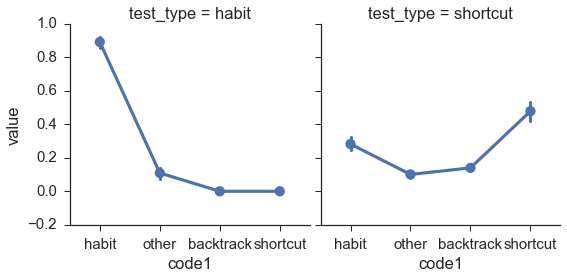

In [64]:
sns.factorplot(x='code1', y='value', col='test_type',
               ci=68, units='subid', data=proportions)

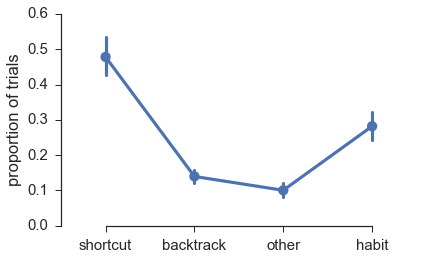

In [90]:
x_order = ['shortcut', 'backtrack', 'other', 'habit']

p = sns.factorplot(x='code1', y='value', order=x_order,
                   ci=68, units='subid', aspect=1.5,
                   data=proportions.loc[proportions.test_type == 'shortcut'])
p.set_xlabels('')
p.set_ylabels('proportion of trials')
sns.despine(trim=True)
plt.savefig('/Volumes/group/awagner/sgagnon/SST/nav_data/group/results/shortcut_choices.png', dpi=300)

In [91]:
data.merge(group_info).groupby(['group', 'code1']).mean()

subid     value
group   code1                         
control backtrack   7.846154  0.137821
        habit       7.846154  0.269231
        other       7.846154  0.096154
        shortcut    7.846154  0.496795
stress  backtrack  15.750000  0.145833
        habit      15.750000  0.322917
        other      15.750000  0.114583
        shortcut   15.750000  0.416667

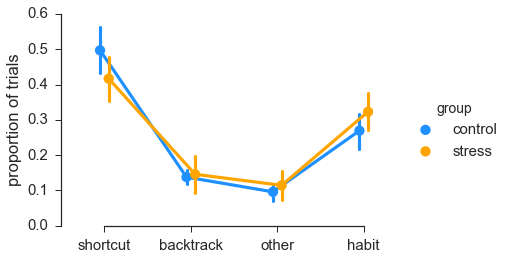

In [92]:
data = proportions.loc[proportions.test_type == 'shortcut']

p = sns.factorplot(x='code1', y='value', hue='group',
                   ci=68, units='subid', order=x_order,
                   aspect=1.5, dodge=.1, palette=['dodgerblue', 'orange'],
                   data=data.merge(group_info))
p.set_xlabels('')
p.set_ylabels('proportion of trials')
sns.despine(trim=True)
plt.savefig('/Volumes/group/awagner/sgagnon/SST/nav_data/group/results/shortcut_choices_bygroup.png', dpi=300)